# 다중 분류 (multi-class classification)

## 데이터 소개
- fish에 대한 weight, length, diagonal, height, width를 가지고 주어진 생선 종류(총 7개) 중 어디에 유사한 생선인지를 맞추는 문제

In [2]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [4]:
fish_train_pdf = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_train_pdf[:5]

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [5]:
fish_train = fish_train_pdf.to_numpy()
fish_target = fish['Species'].to_numpy()

print(f"fish_train = {fish_train[:5]}")
print(f"fish_target = {fish_target[:5]}")

fish_train = [[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
fish_target = ['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [6]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(fish_train, fish_target, random_state=42)

In [7]:
# 정규화 수행
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_X)

train_scaled_X = ss.transform(train_X)
test_scaled_X = ss.transform(test_X)

## KNeighborsClassifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled_X, train_Y)

print("KNeighborsClassifier's score")
print(f"train's score : {kn.score(train_scaled_X, train_Y)}")
print(f"test's score : {kn.score(test_scaled_X, test_Y)}")

KNeighborsClassifier's score
train's score : 0.8907563025210085
test's score : 0.85


In [9]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

### 예측 및 예측 확률 확인

In [10]:
import numpy as np

pred = kn.predict(test_scaled_X[:5])

print('predict of test_scaled_X[:5] : ', pred)


# ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']
print("\n", "*"*70)
print("predcit probability of test_scaled_X[:5]")
proba = kn.predict_proba(test_scaled_X[:5])
print(np.round(proba, decimals=4)) # np.round에서 decimals=4로 하면, 소수점 4자리까지 표시

predict of test_scaled_X[:5] :  ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']

 **********************************************************************
predcit probability of test_scaled_X[:5]
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


### 이웃점 확인

In [11]:
distance, indexes = kn.kneighbors(test_scaled_X[3:4])
train_Y[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

## Logistic Regression

- 확률문제이기 때문에 출력값을 0~1 사이의 값을 바꿔줘야 하고, 이를 위해 다양한 활성화 함수가 존재
  - 대표적인 시그모이드 함수(sigmod): 무한한 음수일 경우 0, 무한한 양수일 경우 1




### 시그모이드 함수



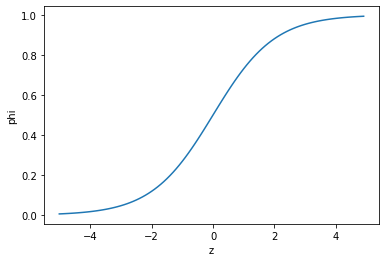

In [12]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1+np.exp(-z)) # 1/1+e^-z
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 이진분류 logistic regression

In [13]:
# 도미(bream), 빙어(smelt) 만 추출
bream_smelt_indexes = (train_Y=='Bream') | (train_Y=='Smelt')
train_bream_smelt = train_scaled_X[bream_smelt_indexes]
target_bream_smelt = train_Y[bream_smelt_indexes]

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)


print("predict of train_bream_smelt[:5] : ", lr.predict(train_bream_smelt[:5]))
print("predict probability of train_bream_smelt[:5]")
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_) # Bream이 음성 클래스, Smelt가 양성 클래스(시그모이드 기준)
print(lr.coef_, lr.intercept_)

predict of train_bream_smelt[:5] :  ['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
predict probability of train_bream_smelt[:5]
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']
[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


### 다중분류 logistic regression

- 다중 분류에서는 softmax 함수를 적용
  - softmax는 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고, 전체 합이 1이 되도록 만듬. 이를 위해 지수 함수를 사용하기 때문에 정규화된 지수 함수라고도 불림

In [14]:
# C : 계수의 규제를 의미 (default:1이고 값이 작을수록 규제가 커짐)
# max_inter : 딥러닝의 epoch처럼 학습 횟수를 의미
lr = LogisticRegression(C=20, max_iter=1000) 

lr.fit(train_scaled_X, train_Y)

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
print("Logistic Regression's score")
print(f"train's score : {lr.score(train_scaled_X, train_Y)}")
print(f"test's score : {lr.score(test_scaled_X, test_Y)}")

Logistic Regression's score
train's score : 0.9327731092436975
test's score : 0.925


In [23]:
print("predict of test_scaled_X[:5]")
print(lr.predict(test_scaled_X[:5]))

proba = lr.predict_proba(test_scaled_X[:5])
print("predict probability of test_scaled_X[:5]")
print(np.round(proba, decimals=3))

print("\n", "="*70)
print(f"lr.classes_ = {lr.classes_}")
print(f"lr.coef_ = {lr.coef_}, {lr.coef_.shape}")
print(f"lr.intercept_ = {lr.intercept_}, {lr.intercept_.shape}")

predict of test_scaled_X[:5]
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
predict probability of test_scaled_X[:5]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]

lr.classes_ = ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
lr.coef_ = [[-1.49002911 -1.02919221  2.59351113  7.70354318 -1.20068079]
 [ 0.19619256 -2.0106062  -3.77982687  6.50490143 -1.99486463]
 [ 3.56278472  6.34361428 -8.48973364 -5.75756295  3.79309039]
 [-0.10458533  3.60316654  3.93067417 -3.61731229 -1.75070607]
 [-1.40059104 -6.07505264  5.25967743 -0.87222909  1.86043657]
 [-1.38528628  1.49217379  1.3922839  -5.67732641 -4.40095877]
 [ 0.62151448 -2.32410356 -0.90658611  1.71598614  3.69368329]], (7, 5)
lr.intercept_ = [-0.09204845 -0.26290731  3.25101057 -0.14742485  2.65496057 -6.78780765
  1.38421712], (7,)
